In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 29 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (10.3 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 126209 files and direc

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.font_manager as fm
fontpath='/usr/share/fonts/trutype/nanum/NaumBarunGothic.ttf'
font=fm.FontProperties(fname=fontpath, size=9)
plt.rc('font',family='NanumBarunGothic')

In [ ]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


    학년도             기간(1)   기간(2)     총 계       남       여        인문        자연  \
0  1994  1993-06-11~06-24  (14일간)  742668  437465  305203  336941.0  340252.0   
1  1994  1993-10-02~10-11  (14일간)  750181  444612  305569  342555.0  343168.0   
2  1995  1994-09-12~09-27  (16일간)  781749  452360  329389  372311.0  336390.0   
3  1996  1995-09-11~09-23  (13일간)  840661  478707  361954  413958.0  351719.0   
4  1997  1996-09-02~09-14  (13일간)  824374  472527  351847  393295.0  356560.0   

       예체능     재학생     졸업생    검정등  3개 영역 이하 응시수수료  4개 영역 응시수수료  5개 영역 응시수수료  \
0  65475.0  521806  213459   7403           12000        12000        12000   
1  64458.0  496617  243826   9738           12000        12000        12000   
2  73048.0  477960  261492  42297           12000        12000        12000   
3  74984.0  526833  300482  13346           12000        12000        12000   
4  74519.0  545023  268044  11307           12000        12000        12000   

   6개 영역 응시수수료  
0          NaN  
1   

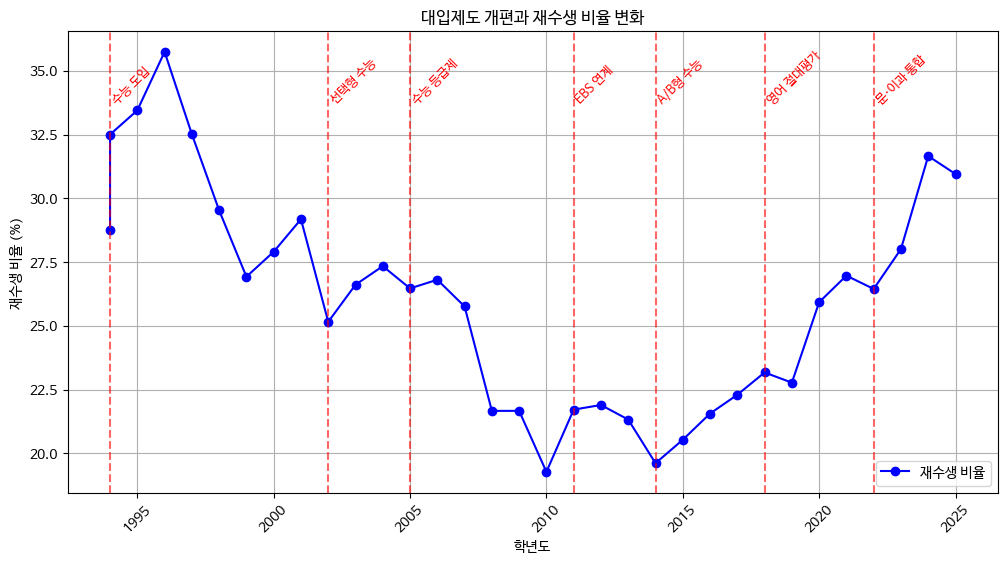

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 파일 경로
df = pd.read_csv('/content/drive/MyDrive/한국교육과정평가원_대학수학능력시험 연도별 접수현황_20241231.csv', encoding='euc-kr')

# 데이터 확인
print(df.head())


# 필요한 컬럼 추출 및 정리
df_filtered = df[['학년도', '재학생', '졸업생', '총 계']].copy()
df_filtered.columns = ['Year', 'Current_Students', 'Graduates', 'Total']

# 숫자형 변환 및 결측치 제거
df_filtered = df_filtered.dropna()
df_filtered[['Year', 'Current_Students', 'Graduates', 'Total']] = df_filtered[['Year', 'Current_Students', 'Graduates', 'Total']].astype(int)

# 재수생 비율 계산
df_filtered['Repeater_Rate'] = df_filtered['Graduates'] / df_filtered['Total'] * 100

# 대입제도 개편 시기 및 주요 변화
reform_years = [1981, 1994, 2002, 2005, 2011, 2014, 2018, 2022, 2028]
reform_labels = [
    "학력고사 도입", "수능 도입", "선택형 수능", "수능 등급제", "EBS 연계",
    "A/B형 수능", "영어 절대평가", "문·이과 통합", "수능 선택 폐지(예정)"
]

# 시각화
plt.figure(figsize=(12, 6))
plt.plot(df_filtered['Year'], df_filtered['Repeater_Rate'], marker='o', linestyle='-', color='b', label='재수생 비율')

# 대입제도 개편 연도 표시
for i, year in enumerate(reform_years):
    if year in df_filtered['Year'].values:
        plt.axvline(x=year, color='r', linestyle='--', alpha=0.6)
        plt.text(year, max(df_filtered['Repeater_Rate']) - 2, reform_labels[i], rotation=45, color='red', fontsize=9)

# 그래프 설정
plt.xlabel('학년도')
plt.ylabel('재수생 비율 (%)')
plt.title('대입제도 개편과 재수생 비율 변화')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)

# 그래프 출력
plt.show()




> 인용구 추가

